#### This notebook will illustrate how to extract the common keywords, phrases(bigrams) from the text
#####  The datasource used is Womens Clothing E-Commerce Reviews.csv from kaggle. https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import numpy as np 
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import seaborn as sns

In [2]:
#Reading the data
df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
## Review Text columns is the one we are interested in to fetch the keywords.
## fill nans with space
df['Review Text'].fillna(' ', inplace=True)

In [4]:
#initialize lemmatizer which will convert all the words to its base form. 
#Also, would be using stopwords to eliminate the most frequently occuring words in english. 
#This can be extended further according to the domain keywords which occur frequently

lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [5]:
#this function will split the sentences to words and performs lemmatization and
#returns the iterable corpus to fit the count vectorizer
def text_preprocessing(sentences):          
    text = [' '.join(lem.lemmatize(word) for word in sent.split() if not word in stop_words) for sent in sentences]
    return text
corpus = text_preprocessing(df['Review Text'].values)

In [6]:
#Initializing Count vectorizer with the parameters and fitting it on corpus.
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=100, ngram_range=(1,1))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10] ## listing 10 keywords

['comfortable',
 'love',
 'dress',
 'pretty',
 'store',
 'would',
 'ordered',
 'online',
 'petite',
 'bought']

In [7]:
#This function will return most frequently occuring words. It sorts the keywords based on the frequency and returns the n number
def get_top_n_words(cv, corpus, n=None):
    vec = cv.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [8]:
## Vectorizer to get the unigrams and fetching top20 keywords
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=100, ngram_range=(1,1))
top_words = get_top_n_words(cv, corpus, 20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

In [9]:
top_df.head()

,Word,Freq
0,dress,11151
1,fit,10038
2,size,9194
3,love,9002
4,top,8008


[Text(0, 0, 'dress'),
 Text(0, 0, 'fit'),
 Text(0, 0, 'size'),
 Text(0, 0, 'love'),
 Text(0, 0, 'top'),
 Text(0, 0, 'like'),
 Text(0, 0, 'look'),
 Text(0, 0, 'wear'),
 Text(0, 0, 'color'),
 Text(0, 0, 'great'),
 Text(0, 0, 'would'),
 Text(0, 0, 'fabric'),
 Text(0, 0, 'small'),
 Text(0, 0, 'really'),
 Text(0, 0, 'ordered'),
 Text(0, 0, 'little'),
 Text(0, 0, 'perfect'),
 Text(0, 0, 'one'),
 Text(0, 0, 'flattering'),
 Text(0, 0, 'well')]

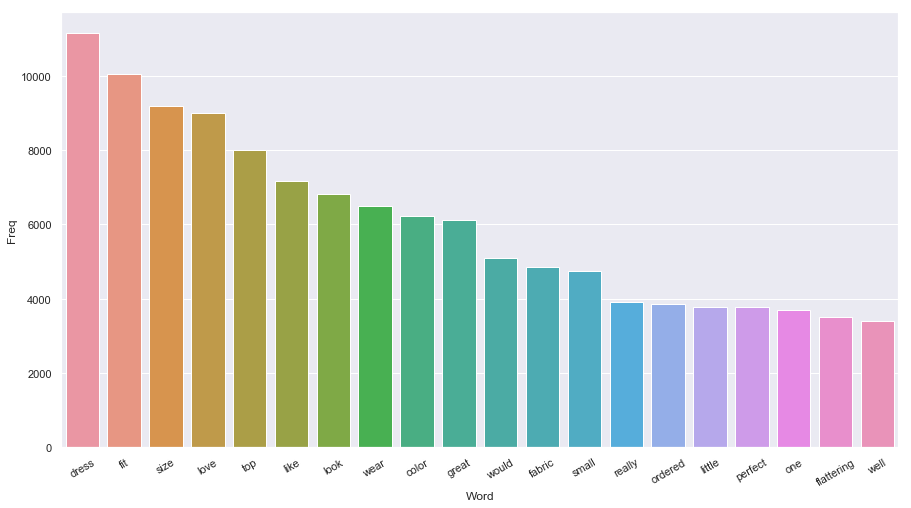

In [10]:
#displaying the results in bar graph
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [11]:
#fetching top 20 bigrams
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=100, ngram_range=(2,2))
top_words = get_top_n_words(cv, corpus, 20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
top_df.head()

,Word,Freq
0,true size,1347
1,fit perfectly,1086
2,look great,884
3,look like,797
4,love dress,741


[Text(0, 0, 'true size'),
 Text(0, 0, 'fit perfectly'),
 Text(0, 0, 'look great'),
 Text(0, 0, 'look like'),
 Text(0, 0, 'love dress'),
 Text(0, 0, 'usually wear'),
 Text(0, 0, 'fit well'),
 Text(0, 0, 'well made'),
 Text(0, 0, 'fit great'),
 Text(0, 0, 'love top'),
 Text(0, 0, 'size small'),
 Text(0, 0, 'run large'),
 Text(0, 0, 'fit true'),
 Text(0, 0, 'feel like'),
 Text(0, 0, 'usual size'),
 Text(0, 0, 'fit like'),
 Text(0, 0, 'fit perfect'),
 Text(0, 0, 'size fit'),
 Text(0, 0, 'small fit'),
 Text(0, 0, 'run small')]

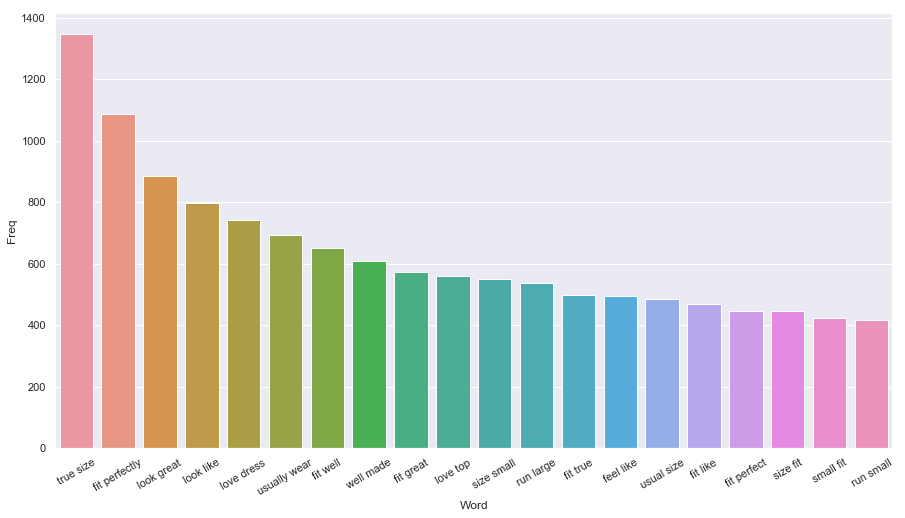

In [12]:
#displaying results in bar graph
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)